Evaluating FA model for 200 trials
Evaluating FA model for 400 trials
Evaluating FA model for 800 trials
Evaluating FA model for 1600 trials
Evaluating FA model for 3200 trials


Text(0.5, 1.0, '100 neurons, 10 latents')

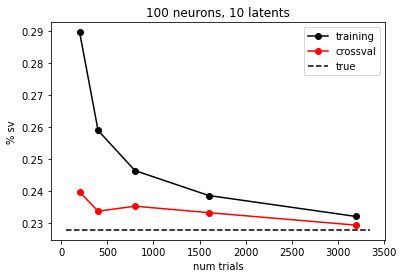

In [1]:
import numpy as np
import pandas as pd
import sim_fa as sf
import factor_analysis as fa
import matplotlib.pyplot as plt
from timeit import default_timer as timer

early_stop = True
n_trials = [200,400,800,1600,3200]
n_neurons = 100
n_latents = 10
rand_seed = 99

# simulate from a factor analysis model
fa_simulator = sf.sim_fa(n_neurons,n_latents,model_type='fa',rand_seed=rand_seed)
sim_params = fa_simulator.get_params()
sim_model = fa.factor_analysis(model_type='fa')
sim_model.set_params(sim_params)
true_psv = sim_model.compute_metrics()['psv']

train_psv,cv_psv = np.empty(len(n_trials)),np.empty(len(n_trials))
for i,N in enumerate(n_trials):
    print(f"Evaluating FA model for {N} trials")
    X = fa_simulator.sim_data(N,rand_seed=rand_seed)
    model = fa.factor_analysis()
    model.train(X,n_latents,rand_seed=rand_seed)
#     train_psv[i] = model.compute_metrics()['psv']
    train_psv[i],cv_psv[i] = model.compute_cv_psv(X,n_latents,n_boots=100,\
        rand_seed=rand_seed,return_each=False,test_size=0.2,early_stop=True)

fig,ax = plt.subplots(1,1)
ax.plot(n_trials,train_psv,'ko-',label='training')
ax.plot(n_trials,cv_psv,'ro-',label='crossval')
ax.plot(ax.get_xlim(),np.ones(2)*true_psv,'k--',label='true')
ax.set_xlabel('num trials')
ax.set_ylabel('% sv')
ax.legend()
ax.set_title(f"{n_neurons} neurons, {n_latents} latents")